In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import yelpapi









In [5]:
census_pd = pd.read_csv("project_data.csv")


# Preview the data
census_pd.head()





,States,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,AL,4830620,2341093,2489527,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
1,AK,733375,384160,349215,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,...,17.954217,21.990964,13.470482,11.663253,2102.443114,65.080723,27.586145,7.121687,0.209639,9.268072
2,AZ,6641928,3299088,3342840,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,...,20.442442,26.056832,9.813069,9.877096,1843.647444,78.244752,15.364818,6.225149,0.165941,9.469901
3,AR,2958208,1451913,1506295,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,...,17.985693,23.384088,11.154891,17.531241,1831.021866,76.176204,17.080730,6.535620,0.206423,8.529489
4,CA,38421464,19087135,19334329,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,...,19.192177,23.656127,9.582901,11.403417,2140.543627,77.245901,13.978921,8.592965,0.182876,10.191290


In [15]:
from yelpapi import YelpAPI
yelp_api = YelpAPI('clXvdDssfwpiryl9URikQMy0kRfdf8yZBWqPSc4pk-bdiK52Awc7eAQxakB8rv0c_xlMLyU7Saw_In-8dI6UHvIN2HQC739yByp0AV_VMiltc8yIKzLnzlYMUV_aW3Yx')


def price_rating(state): 

    results = []
    states = []
    prices = []
    cuisines = []
    ratings = []
    totalreviews = []
    search_results = yelp_api.search_query(term="restaurant", location=state, limit=50, sort_by="review_count")
    for business in search_results['businesses']:
        
        try:
            price = business['price']
        except KeyError:
            price = "n/a"
        try:    
            rating= business['rating']
        except KeyError:
            rating = "n/a"
            
        try:
            cuisine=business["categories"][0]['alias']
        except KeyError:
            cuisine = "n/a"
            
        try:
            state=business["location"]['state']
        except KeyError:
            state="n/a"
        try:    
            reviews=business['review_count']
        except KeyError:
            reviews="n/a"
            
        states.append(state)
        prices.append(price)
        ratings.append(rating)
        cuisines.append(cuisine)
        totalreviews.append(reviews)
        
    food_df = pd.DataFrame({'States': states, 'Prices': prices, 'Ratings': ratings, 'Cuisines': cuisines, 'Reviews': totalreviews})
        
    return food_df
all_food_data = pd.DataFrame()

    
for state in census_pd['States']:
    all_food_data=pd.concat([all_food_data, price_rating(state)])

all_food_data
    

   


,States,Prices,Ratings,Cuisines,Reviews
0,AL,$$,4.5,bbq,621
1,AL,$$,4.5,mexican,480
2,AL,$$,4.5,bbq,460
3,AL,$$,4.5,cocktailbars,448
4,AL,$$,4.0,latin,433
5,AL,$$,4.0,burgers,405
6,AL,$$,4.5,southern,348
7,AL,$,4.0,burgers,339
8,AL,$$,3.5,bbq,322
9,AL,$$$,3.5,cajun,318


In [16]:
#maria
sum_by_state = all_food_data.groupby("States").sum()["Reviews"]
sum_by_state

States
AK     17480
AL     14271
AR        38
AZ     71557
CA    260924
CO     65422
CT      6150
DC    100502
FL     72243
GA     67600
HI     94552
IA     10842
ID     43080
KS     15852
KY     23064
MA     80793
MD     38747
ME     25229
MI     33486
MN     35278
MO     24445
MS      6756
MT      4964
NC     33314
ND      4529
NE     15512
NH     10019
NJ     13513
NM     23217
NV    159071
NY    188716
OH     27440
OK     19051
OR     84874
PA     74657
PR     24135
RI     25471
SC     11602
SD      4329
TN     24801
TX     63964
UT     36746
VA     35250
VT     13139
WA    110420
WI     24423
WV      4464
WY      3875
Name: Reviews, dtype: int64

In [17]:
#maria
sum_by_gender = all_food_data.groupby("States").sum()["Reviews"]
count_by_state

NameError: name 'count_by_state' is not defined

In [ ]:
#maria
census_pd

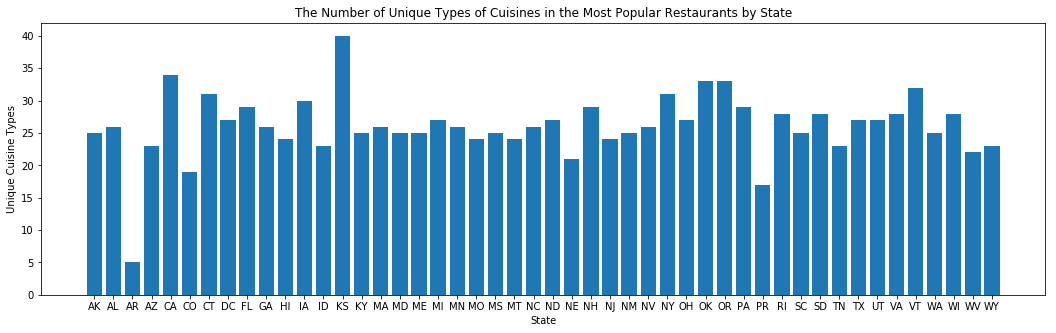

,States,Cuisines
0,AK,25
1,AL,26
2,AR,5
3,AZ,23
4,CA,34


In [19]:
state_type = all_food_data.groupby(["States"])
food_group = state_type["Cuisines"].nunique()
#food_drop1 = food_group.drop("ANT")
#clean_food = food_group.drop("WSX")
df = pd.DataFrame(food_group)
states_food = df.reset_index()


plt.figure(figsize=(18,5))
plt.bar(states_food["States"],states_food["Cuisines"])
plt.title("The Number of Unique Types of Cuisines in the Most Popular Restaurants by State")
plt.xlabel("State")
plt.ylabel("Unique Cuisine Types")


plt.savefig("cuisines_state",bbox_inches='tight',dpi=100)
plt.show()
states_food.head()

In [20]:
census_pd.head()

,States,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,AL,4830620,2341093,2489527,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
1,AK,733375,384160,349215,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,...,17.954217,21.990964,13.470482,11.663253,2102.443114,65.080723,27.586145,7.121687,0.209639,9.268072
2,AZ,6641928,3299088,3342840,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,...,20.442442,26.056832,9.813069,9.877096,1843.647444,78.244752,15.364818,6.225149,0.165941,9.469901
3,AR,2958208,1451913,1506295,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,...,17.985693,23.384088,11.154891,17.531241,1831.021866,76.176204,17.080730,6.535620,0.206423,8.529489
4,CA,38421464,19087135,19334329,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,...,19.192177,23.656127,9.582901,11.403417,2140.543627,77.245901,13.978921,8.592965,0.182876,10.191290


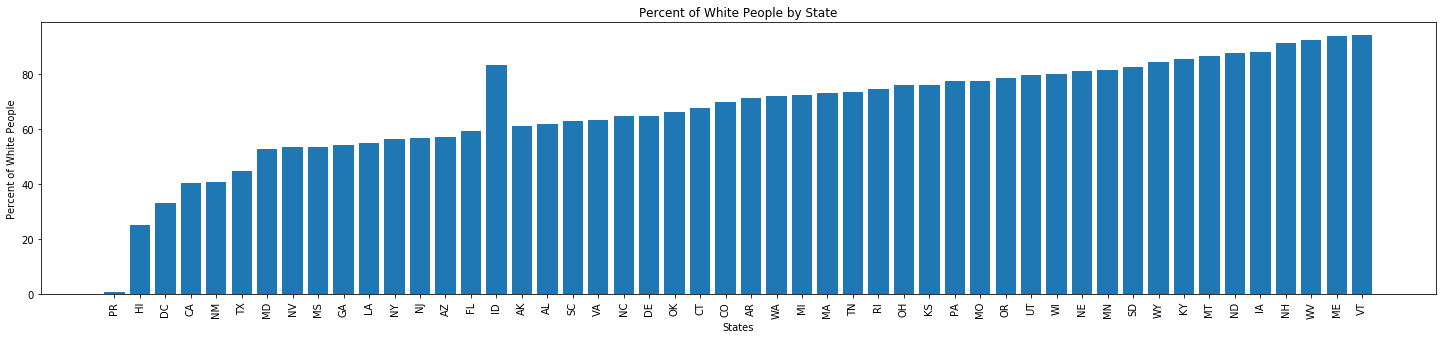

In [22]:
white_people = census_pd.sort_values("White")
white_people.head()
plt.figure(figsize=(25,5))
plt.bar(white_people["States"],white_people["White"])
plt.title("Percent of White People by State")
plt.xlabel("States")
plt.ylabel("Percent of White People")
plt.xticks(rotation='vertical')

plt.savefig("cuisines_state",bbox_inches='tight',dpi=100)
plt.show()

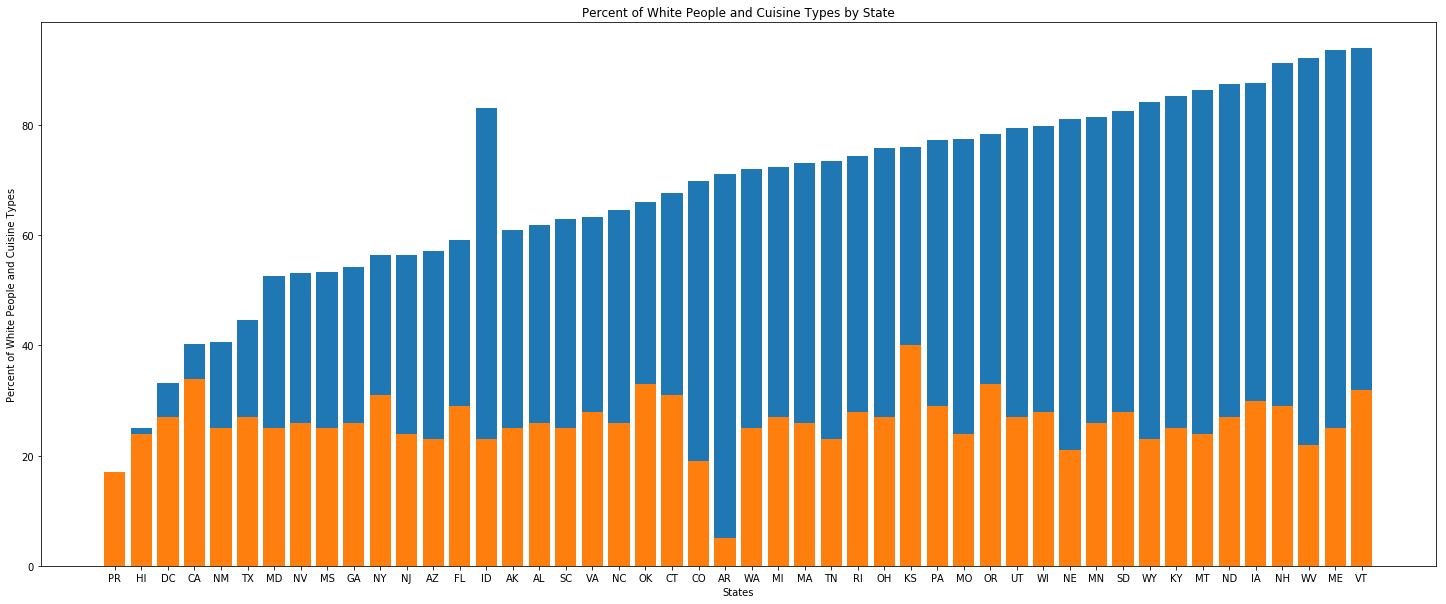

In [43]:
merge_data = pd.DataFrame.merge(white_people,states_food, on="States")
merge_data.head()
plt.figure(figsize=(25,10))
plt.bar(merge_data["States"],merge_data["White"])
plt.bar(merge_data["States"],merge_data["Cuisines"])

plt.title("Percent of White People and Cuisine Types by State")
plt.xlabel("States")
plt.ylabel("Percent of White People and Cuisine Types")
plt.savefig("white_food",bbox_inches='tight',dpi=100)